# 03 - Training Results - Networks Fine-tuned on Selected Loss Function (DF20M)

In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd

from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/danish_fungi_dataset/training_history/baselines_with_loss_mini/'


def get_result_df(df, params):
    group_dict = {
        'EfficientNet-B0': results.filter_items(df, outlen=30, model='efficientnet_b0', **params),
        'ViT-Base-224': results.filter_items(df, outlen=30, model='vit_base_224', **params),

        'EfficientNet-B4': results.filter_items(df, outlen=30, model='efficientnet_b4', **params),
        'NoisyStudent-B4': results.filter_items(df, outlen=30, model='efficientnet_b4_ns', **params),
        'EfficientNetV2-S': results.filter_items(df, outlen=30, model='efficientnetv2_s', **params),

        'ViT-Base-384': results.filter_items(df, outlen=30, model='vit_base_384', **params),
        'DeiT-Base-384': results.filter_items(df, outlen=30, model='deit_base_384', **params),
        'BEiT-Base-384': results.filter_items(df, outlen=30, model='beit_base_384', **params),

        # 'ViT-Large-224': results.filter_items(df, outlen=30, model='vit_large_224', **params),
        'ViT-Large-384': results.filter_items(df, outlen=30, model='vit_large_384', **params)}
    result_df = results.get_metrics_and_time_df(group_dict, primary_metric='f1_score')
    return result_df, group_dict


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_name,history_file,specs_name,model,loss,opt,no_epochs,batch_size,total_batch_size,learning_rate,weight,dataset,scheduler,beta,pretrained_checkpoint,input_size,image_mean,image_std,date
0,df2020_efficientnet_b0_ce_11-23-2021_13-25-42,df2020_efficientnet_b0_ce_11-23-2021_13-25-42.csv,df2020_efficientnet_b0_ce_11-23-2021_13-25-42....,efficientnet_b0,ce,sgd,30,64,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,tf_efficientnet_b0,224,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",23-2021_13-25-42
1,df2020_vit_base_224_ce_11-25-2021_20-01-01,df2020_vit_base_224_ce_11-25-2021_20-01-01.csv,df2020_vit_base_224_ce_11-25-2021_20-01-01.json,vit_base_224,ce,sgd,30,64,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,google/vit-base-patch16-224,224,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",25-2021_20-01-01
2,df2020_efficientnet_b4_ce_12-26-2021_15-10-20,df2020_efficientnet_b4_ce_12-26-2021_15-10-20.csv,df2020_efficientnet_b4_ce_12-26-2021_15-10-20....,efficientnet_b4,ce,sgd,30,32,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,tf_efficientnet_b4,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",26-2021_15-10-20
3,df2020_efficientnet_b4_ns_ce_12-26-2021_17-39-04,df2020_efficientnet_b4_ns_ce_12-26-2021_17-39-...,df2020_efficientnet_b4_ns_ce_12-26-2021_17-39-...,efficientnet_b4_ns,ce,sgd,30,32,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,tf_efficientnet_b4_ns,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",26-2021_17-39-04
4,df2020_efficientnetv2_s_ce_12-26-2021_20-07-20,df2020_efficientnetv2_s_ce_12-26-2021_20-07-20...,df2020_efficientnetv2_s_ce_12-26-2021_20-07-20...,efficientnetv2_s,ce,sgd,30,64,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,tf_efficientnetv2_s,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",26-2021_20-07-20
5,df2020_vit_base_384_ce_12-26-2021_22-11-57,df2020_vit_base_384_ce_12-26-2021_22-11-57.csv,df2020_vit_base_384_ce_12-26-2021_22-11-57.json,vit_base_384,ce,sgd,30,32,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,google/vit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",26-2021_22-11-57
6,df2020_deit_base_384_ce_12-27-2021_00-53-37,df2020_deit_base_384_ce_12-27-2021_00-53-37.csv,df2020_deit_base_384_ce_12-27-2021_00-53-37.json,deit_base_384,ce,sgd,30,32,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,facebook/deit-base-patch16-384,384,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",27-2021_00-53-37
7,df2020_beit_base_384_ce_12-27-2021_03-35-24,df2020_beit_base_384_ce_12-27-2021_03-35-24.csv,df2020_beit_base_384_ce_12-27-2021_03-35-24.json,beit_base_384,ce,sgd,30,32,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,microsoft/beit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",27-2021_03-35-24
8,df2020_vit_large_224_ce_12-27-2021_06-39-22,df2020_vit_large_224_ce_12-27-2021_06-39-22.csv,df2020_vit_large_224_ce_12-27-2021_06-39-22.json,vit_large_224,ce,sgd,30,64,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,google/vit-large-patch16-224,224,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",27-2021_06-39-22
9,df2020_vit_large_384_ce_12-27-2021_08-40-09,df2020_vit_large_384_ce_12-27-2021_08-40-09.csv,df2020_vit_large_384_ce_12-27-2021_08-40-09.json,vit_large_384,ce,sgd,30,16,64,0.01,class_balanced,mini,reduce_lr_on_plateau,0.9999,google/vit-large-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",27-2021_08-40-09


,accuracy,top_3,f1_score,mean_epoch_time,total_time
EfficientNet-B0,63.2,81.2,52.8,03m,1h 04m
ViT-Base-224,68.1,85.4,59.3,03m,1h 13m
EfficientNet-B4,67.5,85.0,57.8,05m,2h 29m
NoisyStudent-B4,69.5,86.5,61.0,05m,2h 28m
EfficientNetV2-S,69.4,86.0,60.5,05m,2h 05m
ViT-Base-384,73.2,88.4,65.0,06m,2h 42m
DeiT-Base-384,71.2,86.8,61.8,06m,2h 42m
BEiT-Base-384,66.3,83.3,56.6,07m,3h 04m
ViT-Large-384,75.0,88.9,66.1,15m,7h 22m


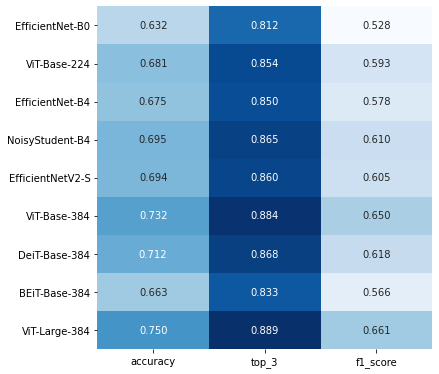

In [3]:
params = dict(loss='ce', opt='sgd', total_batch_size=64)
result_df, group_dict = get_result_df(df, params)
viz.heatmap(result_df)
result_df.round(3) * ([100] * 3 + [1, 1])

In [4]:
BASELINES_DATA_DIR = 'data/danish_fungi_dataset/training_history/baselines_mini/'

# load specification and progress data
baselines_specs_df = results.load_specs_files(BASELINES_DATA_DIR)
baselines_df = results.load_progress_files(baselines_specs_df, path=BASELINES_DATA_DIR)

params = dict(loss='ce', opt='sgd', total_batch_size=64)
baselines_result_df, _ = get_result_df(baselines_df, params)

In [5]:
_baselines_result_df = baselines_result_df.copy()
_baselines_result_df.columns = pd.MultiIndex.from_product([_baselines_result_df.columns, ['Baseline']])
_result_df = result_df.copy()
_result_df.columns = pd.MultiIndex.from_product([_result_df.columns, ['Adj. Loss']])

eval_df = pd.concat([_baselines_result_df, _result_df], axis=1)
for met in ['accuracy', 'top_3', 'f1_score']:
    eval_df[met, 'Diff'] = eval_df[met, 'Adj. Loss'] - eval_df[met, 'Baseline']

_df = eval_df[['accuracy', 'top_3', 'f1_score']].round(3) * 100
for met in ['accuracy', 'top_3', 'f1_score']:
    _df[met, 'Diff'] = '+' + _df[met, 'Diff'].round(1).fillna('').astype(str).replace('+', np.nan)
    _df[met, 'Diff'] = _df[met, 'Diff'].str.replace('+-', '-', regex=False)
_df

accuracy                    top_3                 f1_score  \
                 Baseline Adj. Loss  Diff Baseline Adj. Loss  Diff Baseline   
EfficientNet-B0      63.1      63.2  +0.1     81.0      81.2  +0.2     51.8   
ViT-Base-224         68.5      68.1  -0.4     85.4      85.4  +0.0     58.6   
EfficientNet-B4      68.4      67.5  -0.8     85.1      85.0  -0.2     58.2   
NoisyStudent-B4      70.2      69.5  -0.7     86.1      86.5  +0.4     59.7   
EfficientNetV2-S     70.0      69.4  -0.6     85.6      86.0  +0.4     59.4   
ViT-Base-384         74.7      73.2  -1.5     88.5      88.4  -0.1     65.7   
DeiT-Base-384        73.0      71.2  -1.9     87.6      86.8  -0.8     63.4   
BEiT-Base-384        73.2      66.3  -6.9     88.1      83.3  -4.8     64.3   
ViT-Large-384        75.5      75.0  -0.5     89.3      88.9  -0.3     66.1   

                                  
                 Adj. Loss  Diff  
EfficientNet-B0       52.8  +1.0  
ViT-Base-224          59.3  +0.7  
EfficientNet-B4       57.8  -0.5  
NoisyStudent-B4       61.0  +1.3  
EfficientNetV2-S      60.5  +1.1  
ViT-Base-384          65.0  -0.7  
DeiT-Base-384         61.8  -1.6  
BEiT-Base-384         56.6  -7.7  
ViT-Large-384         66.1  +0.1

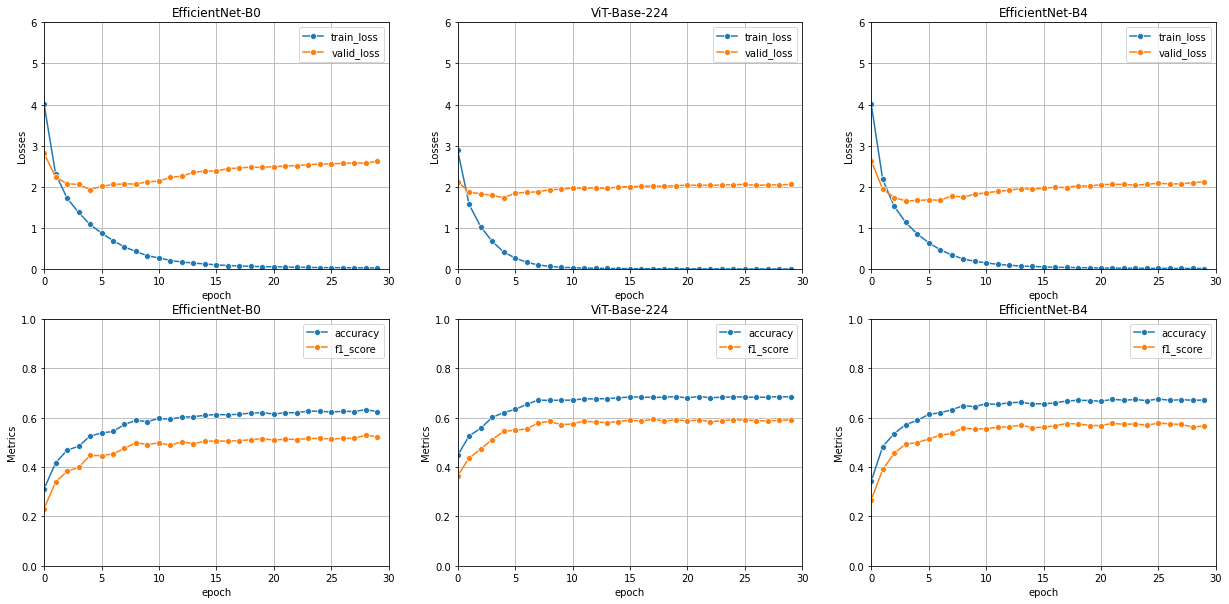

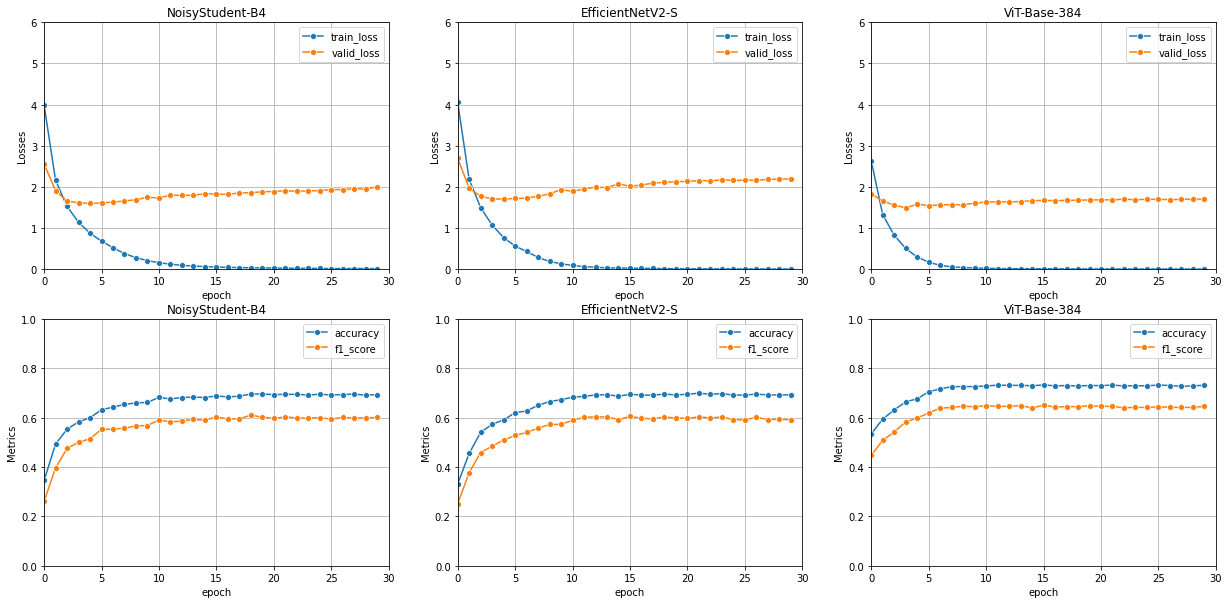

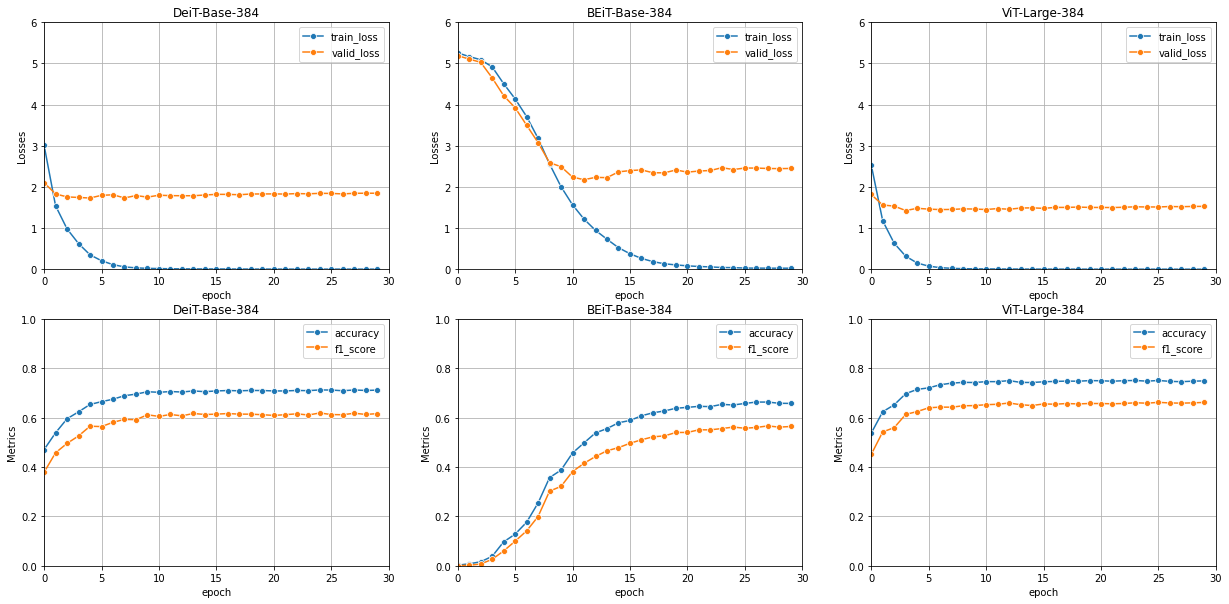

In [6]:
results.compare_training_process(group_dict, xlim=[0, 30])